# AI Agents using `crewai`

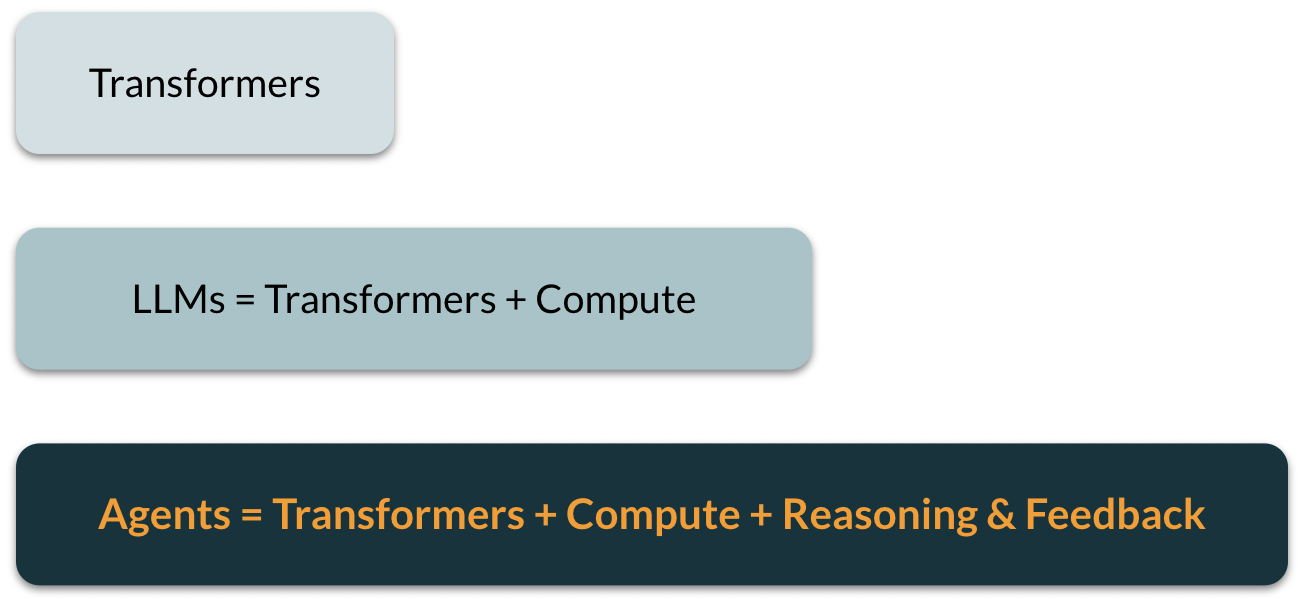

# Let's Code our Market Analyst

## Installations

In [1]:
!pip install python-dotenv crewai crewai-tools langchain-google-genai

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


## Basic Imports

In [2]:
import os
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool

## Initialize the Gemini model

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
gemini_llm = LLM(
    model="gemini/gemini-2.5-flash",
    api_key=os.environ['GEMINI_API_KEY']
)

## Initialize the search tool

https://serper.dev/api-keys

In [5]:
search_tool = SerperDevTool()

## Create a researcher agent

In [6]:
researcher = Agent(
    role="Market Researcher",
    goal="Find and analyze the latest trends in the AI industry",
    backstory="""You are an expert market researcher. You are skilled at
  finding the most relevant and up-to-date information on any given
  topic, and you are known for your ability to synthesize complex
  information into clear and concise summaries.""",
    verbose=True,
    allow_delegation=False,
    tools=[search_tool],
    llm=gemini_llm,
)

## Create a writer agent

In [7]:
writer = Agent(
    role="Content Writer",
    goal="Write a compelling and engaging blog post about the latest AI trends",
    backstory="""You are a renowned content writer, known for your ability
  to create engaging and informative content. You have a knack for
  turning complex topics into easy-to-understand articles that
  resonate with a wide audience.""",
    verbose=True,
    allow_delegation=True,
    llm=gemini_llm,
)

## Create the research task

In [8]:
research_task = Task(
    description="""Research the latest trends in the AI industry.
  Your research should focus on the most significant advancements,
  emerging technologies, and key players. The final output should be a
  detailed report with your findings.""",
    expected_output="A comprehensive report summarizing the latest AI trends.",
    agent=researcher,
)

## Create the writing task

In [9]:
write_task = Task(
    description="""Write a blog post based on the research findings.
  The blog post should be engaging, informative, and accessible to a
  non-technical audience. It should highlight the key trends and their
  potential impact on the future.""",
    expected_output="A 500-word blog post on the latest AI trends.",
    agent=writer,
)

## Create the crew

In [10]:
marketing_crew = Crew(
    agents=[researcher, writer],
    tasks=[research_task, write_task],
    process=Process.sequential,
    verbose=True,
)

# Kick off the crew

In [11]:
result = marketing_crew.kickoff({"query": "latest trends in ML"})

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 997013ec-996c-4958-942e-16e835edd25b                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Task: Research the latest trends in the AI industry.                                                           │
│    Your research should focus on the most significant advancements,                                             │
│    emerging technologies, and key players. The final output should be a                                         │
│    detailed report with your findings.                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Action: Search the internet with Serper                                                               │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"latest trends in AI industry 2023 2024 advancements emerging technologies key            │
│  players\"}"                                                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'latest trends in AI industry 2023 2024 advancements emerging technologies key      │
│  players', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': 'McKinsey technology trends  │
│  outlook 2025', 'link':                                                                                         │
│  'https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/the-top-trends-in-tech', 'snippet': "In   │
│  addition to the growing reach of AI, another new trend we have chosen to highlight in this year's report is    │
│  agentic AI, which has rapidly ...", 'position': 1}, {'title': 'The Top Artificial Intelligence Trends - IBM',  │
│  'link': 'https://www.ibm.com/think/insights/artificial-intelligence-trends', 'snippet': 'Adapting to emerging  │
│  trends is essential to maximizing potential, minimizing risk and responsibly scaling generative AI             │
│  adoption.', 'position': 2}, {'title': 'The 2025 AI Index Report | Stanford HAI', 'link':                       │
│  'https://hai.stanford.edu/ai-index/2025-ai-index-report', 'snippet': 'Nearly 90% of notable AI models in 2024  │
│  came from industry, up from 60% in 2023, while academia remains the top source of highly cited research.       │
│  Model scale ...', 'position': 3}, {'title': '11 New Technologies in AI: All Trends of 2025-2026 - devabit',    │
│  'link': 'https://devabit.com/blog/top-11-new-technologies-in-ai-exploring-the-latest-trends/', 'snippet':      │
│  'From GPT-4 and GANS to XAI and NLP, discover the new technologies in AI and find out how they can be          │
│  implemented in your business to make a profit.', 'position': 4}, {'title': '25 New Technology Trends for 2025  │
│  - Simplilearn.com', 'link': 'https://www.simplilearn.com/top-technology-trends-and-jobs-article', 'snippet':   │
│  '1. Generative AI 2. Quantum Computing 3. 5G Expansion 4. Virtual Reality (VR) 2.0 5. Augmented Reality (AR)   │
│  6. Internet of Things 7. Biotechnology in ...', 'position': 5, 'sitelinks': [{'title': 'Generative AI',        │
│  'link': 'https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/what-is-generative-ai'},       │
│  {'title': 'Nikita Duggal', 'link': 'https://www.simplilearn.com/a...                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: The initial search provides a good overview of recent AI trends, advancements, and key       │
│  players. I see mentions of Generative AI, Agentic AI, Quantum Computing, AI-powered scientific discovery, and  │
│  the increasing role of industry in AI model development. I need to synthesize this information into a          │
│  detailed report, and perhaps explore some of these trends in more detail to ensure comprehensiveness.          │
│  Specifically, I should focus on:                                                                               │
│  1. Significant advancements (e.g., Generative AI, Multimodal AI).                                              │
│  2. Emerging technologies (e.g., Agentic AI, Quantum AI, XAI).                                                  │
│  3. Key players (implicitly, the shift from academia to industry is a key trend, but I might need to            │
│  explicitly name some companies if possible).                                                                   │
│  4. The impact of these trends across industries.                                                               │
│  I will start by consolidating information from the initial search results and then conduct targeted searches   │
│  if necessary.                                                                                                  │
│  Let's refine the information gathering by focusing on the most recurring themes from the initial search to     │
│  build the report sections.                                                                                     │
│  **Plan for the report:**                                                                                       │
│  *   **Introduction:** Briefly state the dynamic nature of the AI industry.                                     │
│  *   **Significant Advancements:**                                                                              │
│      *   Generative AI and its evolution (e.g., multimodal AI, advanced NLP).                                   │
│      *   Deep Learning and Neural Networks continued progression.                                               │
│      *   AI in scientific discovery.                                                                            │
│  *   **Emerging Technologies:**                                                                                 │
│      *   Agentic AI (AI systems that can act autonomously).                                                     │
│      *   Quantum AI (the intersection of quantum computing and AI).                                             │
│      *   Explainable AI (XAI).                                                                                  │
│      *   AI at the Edge.                                                                                        │
│  *   **Key Players and Industry Dynamics:**                                                                     │
│      *   Shift from academia to industry in AI model development.                                               │
│      *   Big Tech companies' roles.                                                                             │
│      *   Startups driving innovation.                                                                           │
│  *   **Impact Across Industries:** Briefly touch upon how these trends are revolutionizing various sectors.     │
│  *   **Future Outlook:** Concluding remarks.           

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"latest advancements in Generative AI multimodal AI 2024\"}"                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'latest advancements in Generative AI multimodal AI 2024', 'type': 'search',        │
│  'num': 10, 'engine': 'google'}, 'organic': [{'title': '77 Generative AI Trends in 2024 (+ Free Downloadable    │
│  PDF)', 'link': 'https://www.multimodal.dev/post/77-generative-ai-trends-in-2024', 'snippet': 'Stay updated on  │
│  the latest Gen AI developments in 2024. Explore 77 trends across security, privacy, and other industries,      │
│  plus a free PDF ...', 'position': 1}, {'title': 'Top 10: AI Trends in 2024 - AI Magazine', 'link':             │
│  'https://aimagazine.com/top10/top-10-ai-trends-in-2024', 'snippet': 'Multimodal AI continued to revolutionise  │
│  the field in 2024, enabling systems to process and generate content across text, image and audio ...',         │
│  'position': 2, 'sitelinks': [{'title': '10. Improved Accessibility', 'link':                                   │
│  'https://aimagazine.com/top10/top-10-ai-trends-in-2024#:~:text=10.%20Improved%20accessibility'}, {'title':     │
│  '9. Vr/ar Integration', 'link':                                                                                │
│  'https://aimagazine.com/top10/top-10-ai-trends-in-2024#:~:text=9.%20VR%2FAR%20integration'}, {'title': '8. Ai  │
│  Assistants', 'link': 'https://aimagazine.com/top10/top-10-ai-trends-in-2024#:~:text=8.%20AI%20assistants'}]},  │
│  {'title': 'The Top Artificial Intelligence Trends - IBM', 'link':                                              │
│  'https://www.ibm.com/think/insights/artificial-intelligence-trends', 'snippet': 'Multimodal AI models must     │
│  demonstrate performance across more than just the text-specific tasks that the Leaderboard benchmarks          │
│  evaluate. Multimodal model ...', 'position': 3, 'sitelinks': [{'title': "What We've Seen", 'link':             │
│  'https://www.ibm.com/think/insights/artificial-intelligence-trends#:~:text=What%20we%27ve%20seen,-Progress%20  │
│  doesn%27t%20necessarily%20require'}, {'title': 'Ai Benchmark Saturation And...', 'link':                       │
│  'https://www.ibm.com/think/insights/artificial-intelligence-trends#:~:text=AI%20benchmark%20saturation%20and%  │
│  20diversification'}, {'title': 'Embodied Ai And World Models', 'link':                                         │
│  'https://www.ibm.com/think/insights/artificial-intelligence-trends#:~...                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: The search for "latest advancements in Generative AI multimodal AI 2024" yielded excellent   │
│  results, confirming Multimodal AI as a significant advancement, with examples like Google's Gemini 1.5 Pro.    │
│  It also highlighted Generative AI's transition from hype to an essential business tool, its role in            │
│  personalization, creative co-creation, and scientific research. I have enough information to build the         │
│  "Significant Advancements" section.                                                                            │
│  Next, I need to gather more detailed information about "Emerging Technologies" such as Agentic AI, Quantum     │
│  AI, and Explainable AI (XAI), and also AI at the Edge.                                                         │
│  I will perform targeted searches for each of these.                                                            │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"Agentic AI definition trends applications 2024\"}"                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'Agentic AI definition trends applications 2024', 'type': 'search', 'num': 10,      │
│  'engine': 'google'}, 'organic': [{'title': 'Agentic AI Trends 2025: Transform Business with AI Agents -        │
│  Kroolo', 'link': 'https://kroolo.com/blog/agentic-ai-trends', 'snippet': 'Microsoft describes agentic AI as    │
│  an autonomous AI system that plans, reasons and acts to complete tasks with minimal human oversight. This      │
│  ...', 'position': 1}, {'title': 'What Is Agentic AI? Definition | Proofpoint US', 'link':                      │
│  'https://www.proofpoint.com/us/threat-reference/agentic-ai', 'snippet': 'Agentic AI is a sophisticated form    │
│  of artificial intelligence that can accomplish specific goals with limited supervision by mimicking human      │
│  decision-making ...', 'position': 2}, {'title': 'Seizing the agentic AI advantage - McKinsey', 'link':         │
│  'https://www.mckinsey.com/capabilities/quantumblack/our-insights/seizing-the-agentic-ai-advantage',            │
│  'snippet': "In short, agentic AI doesn't just automate. It redefines how organizations operate, adapt, and     │
│  create value.", 'position': 3}, {'title': "Agentic AI: 4 reasons why it's the next big thing in AI research -  │
│  IBM", 'link': 'https://www.ibm.com/think/insights/agentic-ai', 'snippet': 'Agentic AI refers to a system or    │
│  program that is capable of autonomously performing tasks on behalf of a user or another system by designing    │
│  its workflow and ...', 'position': 4}, {'title': 'Agentic AI Explained: Definition, Benefits, and Use Cases -  │
│  Domo', 'link': 'https://www.domo.com/blog/agentic-ai-explained-definition-benefits-and-use-cases', 'snippet':  │
│  'Agentic AI is an advanced AI system that can act independently, make decisions, and adapt to changing         │
│  situations.', 'position': 5}, {'title': 'Agentic AI: The most important technology trend in 2025 - Novomind',  │
│  'link': 'https://www.novomind.com/en/blog/agentic-ai/', 'snippet': 'Agentic AI is an advanced form of          │
│  artificial intelligence that makes independent decisions and performs tasks without human interven...          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I have gathered good information on Agentic AI. I understand it as an autonomous AI system   │
│  that can plan, reason, and act to complete tasks with minimal human oversight, mimicking human                 │
│  decision-making. It's seen as a revolutionary technology that redefines how organizations operate. Gartner     │
│  predicts a significant increase in its adoption by 2028.                                                       │
│  Next, I need to gather information on Quantum AI and Explainable AI (XAI), and then AI at the Edge.            │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"Quantum AI definition trends applications 2024\"}"                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'Quantum AI definition trends applications 2024', 'type': 'search', 'num': 10,      │
│  'engine': 'google'}, 'organic': [{'title': 'Quantum Computing 2024: AI, Innovation & Research Trends',         │
│  'link': 'https://www.firstignite.com/exploring-the-latest-quantum-computing-advancements-in-2024/',            │
│  'snippet': 'Key trends include continued efforts toward quantum supremacy, where quantum computers outperform  │
│  classical supercomputers on specific tasks.', 'position': 1}, {'title': 'Quantum AI Trends - Empathy First     │
│  Media', 'link': 'https://empathyfirstmedia.com/quantum-ai-trends/', 'snippet': 'Industry data shows the        │
│  Quantum AI market growing at 39% CAGR from 2024 to 2025—a clear signal for organizations ready to adopt        │
│  evidence-based ...', 'position': 2}, {'title': 'The Next Breakthrough In Artificial Intelligence: How Quantum  │
│  AI ...', 'link':                                                                                               │
│  'https://www.forbes.com/sites/bernardmarr/2024/10/08/the-next-breakthrough-in-artificial-intelligence-how-qua  │
│  ntum-ai-will-reshape-our-world/', 'snippet': 'Quantum AI, the fusion of quantum computing and artificial       │
│  intelligence, is poised to revolutionize industries from finance to healthcare.', 'position': 3}, {'title':    │
│  "Quantum AI's Role in the Future: Unlocking New Frontiers in ...", 'link':                                     │
│  'https://quantilus.com/article/quantum-ais-role-in-the-future-unlocking-new-frontiers-in-technology/',         │
│  'snippet': 'Quantum AI combines quantum computing with AI, using unique abilities to run AI models faster,     │
│  and is predicted to redefine industries by 2030.', 'position': 4}, {'title': 'Top 9 Applications of Quantum    │
│  Computing In 2024 - EPB', 'link':                                                                              │
│  'https://epb.com/get-connected/gig-internet/top-applications-of-quantum-computing/', 'snippet': '1. Quantum    │
│  Cryptography and Secure Communications · 2. Optimization and Operations Research · 3. Drug Discovery and       │
│  Material Science · 4. Machine Learning and AI.', 'position': 5}, {'title': 'Artificial Intelligence and        │
│  Quantum Computing: The Fundamentals', 'link': 'https://www.spglobal.co...                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I have successfully gathered information on Quantum AI. It is the fusion of quantum          │
│  computing and AI, promising a paradigm shift in computational speed and capability, with applications in drug  │
│  discovery, financial modeling, and climate simulations. The market is projected to grow significantly.         │
│  Now, I will search for Explainable AI (XAI) and then AI at the Edge.                                           │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"Explainable AI (XAI) definition trends applications 2024\"}"                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'Explainable AI (XAI) definition trends applications 2024', 'type': 'search',       │
│  'num': 10, 'engine': 'google'}, 'organic': [{'title': 'Explainable Artificial Intelligence (XAI): What we      │
│  know and what is ...', 'link': 'https://www.sciencedirect.com/science/article/pii/S1566253523001148',          │
│  'snippet': 'The study starts by explaining the background of XAI, common definitions, and summarizing          │
│  recently proposed techniques in XAI for supervised machine learning.', 'position': 1}, {'title': '[PDF]        │
│  Explainable AI – the Latest Advancements and New Trends - arXiv', 'link': 'https://arxiv.org/pdf/2505.07005',  │
│  'snippet': 'Explainable AI aims to understand AI decisions, as neural networks make it difficult to            │
│  understand the reasons behind them. It is linked to meta-reasoning.', 'position': 2}, {'title': 'Recent        │
│  Applications of Explainable AI (XAI): A Systematic Literature ...', 'link':                                    │
│  'https://www.mdpi.com/2076-3417/14/19/8884', 'snippet': "Additionally, emerging applications in law,           │
│  education, and social care highlight XAI's expanding impact. The review reveals a predominant use of local     │
│  ...", 'position': 3}, {'title': 'Entering the Age of Explainable AI - TDWI', 'link':                           │
│  'https://tdwi.org/articles/2024/02/22/adv-all-entering-the-age-of-explainable-ai.aspx', 'snippet':             │
│  "Explainable AI (XAI) helps to build trust among users in the accuracy of AI's results and predictions. The    │
│  use of XAI is becoming more critical ...", 'position': 4}, {'title': 'Explainable AI (XAI) 2024: algorithmic   │
│  transparency and the EU AI Act', 'link': 'https://www.swiftask.ai/blog/explainable-ai-xai', 'snippet':         │
│  "Explainable AI (XAI) makes AI decisions understandable by humans, revealing the 'why' and 'how' of            │
│  predictions, unlike traditional opaque ...", 'position': 5}, {'title': 'Unlocking the Power of Explainable AI  │
│  in Modern Tech - Viso Suite', 'link': 'https://viso.ai/deep-learning/explainable-ai/', 'snippet':              │
│  'Explainable AI (XAI) refers to tools and methods that explain intel...                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I have gathered comprehensive information on Explainable AI (XAI). It aims to make AI        │
│  decisions understandable by humans, revealing the "why" and "how" of predictions, which is crucial for         │
│  building trust, ensuring regulatory compliance (like the EU AI Act), and enhancing the reliability of AI       │
│  systems. Its applications are expanding across various sectors including healthcare, finance, and              │
│  cybersecurity.                                                                                                 │
│  Finally, I need to gather information on AI at the Edge.                                                       │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"AI at the Edge definition trends applications 2024\"}"                                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'AI at the Edge definition trends applications 2024', 'type': 'search', 'num': 10,  │
│  'engine': 'google'}, 'organic': [{'title': 'Edge AI – Driving Next-Gen AI Applications in 2024 - Viso Suite',  │
│  'link': 'https://viso.ai/edge-ai/edge-ai-applications-and-trends/', 'snippet': 'Edge AI combines Edge          │
│  Computing and Artificial Intelligence to run machine learning tasks directly on connected edge devices.',      │
│  'position': 1}, {'title': 'The top 6 edge AI trends—as showcased at Embedded World 2024', 'link':              │
│  'https://iot-analytics.com/top-6-edge-ai-trends-as-showcased-at-embedded-world-2024/', 'snippet': '6 edge AI   │
│  trends observed at Embedded World 2024 · 1. NVIDIA becoming a key edge (AI) computing company · 2.             │
│  Simplifying on-device AI inferencing ...', 'position': 2}, {'title': 'Top 3 edge AI trends to look for in      │
│  2024 | CNCF', 'link': 'https://www.cncf.io/blog/2024/08/02/top-3-edge-ai-trends-to-look-for-in-2024/',         │
│  'snippet': '2024 will see the rise of Micro AI—lightweight, hyper-efficient AI models for edge devices like    │
│  smartwatches, IoT sensors, drones, and home ...', 'position': 3}, {'title': 'Chapter 1: Edge AI Market         │
│  Analysis and Trends - Wevolver', 'link':                                                                       │
│  'https://www.wevolver.com/article/2024-state-of-edge-ai-report/edge-ai-market-analysis-and-trends',            │
│  'snippet': 'In essence, the growth of the Edge AI market represents a response to the evolving demands of      │
│  industries and engineers in a data-driven world.', 'position': 4}, {'title': 'Edge-AI trends in 2024 -         │
│  Medium', 'link': 'https://medium.com/@natishalom/edge-ai-trends-in-2024-c5a487a85f1e', 'snippet': '2024 will   │
│  see the rise of lightweight, hyper-efficient AI models designed specifically for resource-constrained edge     │
│  devices.', 'position': 5}, {'title': '[PDF] 2024 STATE OF EDGE AI REPORT | DATEurope', 'link':                 │
│  'https://dateurope.com/wp-content/uploads/2024/05/2024STAGEOFEDGEAIREPORT.pdf', 'snippet': 'Technology trends  │
│  like TinyML, embedded machine learning, and on-device neuromorphic compu...                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  ## The Latest Trends in the AI Industry: A Comprehensive Report (2023-2024 Outlook)                            │
│                                                                                                                 │
│  The Artificial Intelligence (AI) industry continues its rapid evolution, marked by groundbreaking              │
│  advancements, the emergence of sophisticated new technologies, and a significant shift in the landscape of     │
│  key players. The period spanning 2023-2024 has seen AI transition from a burgeoning field to an indispensable  │
│  tool across virtually all sectors, driving unprecedented innovation and redefining operational paradigms.      │
│                                                                                                                 │
│  ### 1. Significant Advancements: Redefining AI Capabilities                                                    │
│                                                                                                                 │
│  The core of recent AI advancements lies in its increasing ability to generate, understand, and act with        │
│  greater autonomy and sophistication.                                                                           │
│                                                                                                                 │
│  **1.1 Generative AI and Multimodal AI:**                                                                       │
│  Generative AI has moved beyond mere text generation to become a cornerstone of creative and analytical         │
│  processes. Its capability to create diverse content—from text and images to audio and video—has seen a         │
│  dramatic increase in fidelity and applicability. A key advancement in this domain is **Multimodal AI**, which  │
│  allows systems to process and generate content across various data types simultaneously. For instance, models  │
│  like Google's Gemini 1.5 Pro demonstrate the ability to understand and generate information from vast context  │
│  windows encompassing text, images, and other modalities. This enables more nuanced understanding and richer,   │
│  more contextually aware outputs, simplifying complex content creation and analysis tasks. Generative AI is     │
│  now recognized as an essential business tool, driving hyper-personalization, enabling creative co-creation,    │
│  and significantly accelerating scientific research by generating hypotheses and simulating complex scenarios.  │
│                                                                                                                 │
│  **1.2 Continued Progress in Deep Learning and Neural Networks:**                                               │
│  Deep learning, the foundation of many AI breakthroughs, continues to mature with improvements in neural        │
│  network architectures and training methodologies. These advancements contribute to the enhanced performance    │
│  of generative models, natural language processing (NLP), and computer vision systems.                          │
│                                                                                                                 │
│  **1.3 AI-Powered Scientific Discovery:**                                                                       │
│  AI is increasingly being utilized to accelerate scient

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: e5651272-5331-4666-8799-7cf92a64383a                                                                     │
│  Agent: Market Researcher                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Task: Write a blog post based on the research findings.                                                        │
│    The blog post should be engaging, informative, and accessible to a                                           │
│    non-technical audience. It should highlight the key trends and their                                         │
│    potential impact on the future.                                                                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  # The AI Revolution: What's Hot and What It Means for You                                                      │
│                                                                                                                 │
│  Artificial Intelligence (AI) isn't just a buzzword anymore; it's a rapidly evolving force that's transforming  │
│  our world at an astonishing pace. From helping us create amazing content to solving complex scientific         │
│  mysteries, AI is no longer just in labs – it's becoming an indispensable part of our daily lives and           │
│  industries. Let's dive into the most exciting trends shaping AI right now and what they mean for our future.   │
│                                                                                                                 │
│  ## Beyond Text: The Rise of Generative and Multimodal AI                                                       │
│                                                                                                                 │
│  Remember when AI could only generate text? Well, it's grown up! **Generative AI** can now create everything    │
│  from stunning images and realistic audio to compelling video. But the real game-changer is **Multimodal AI**.  │
│  Imagine an AI that can understand and create content using text, images, and even video all at once. This      │
│  means AI can now process complex information in a much more human-like way, leading to incredibly rich and     │
│  context-aware outputs. Think hyper-personalized experiences, lightning-fast content creation, and even         │
│  accelerating scientific research by generating new ideas and simulating complex scenarios. It's like having a  │
│  super-creative, multi-talented assistant at your fingertips.                                                   │
│                                                                                                                 │
│  ## Smart Enough to Act: Welcome to Agentic AI                                                                  │
│                                                                                                                 │
│  If traditional AI responds to your commands, **Agentic AI** is like an intelligent team member who can think   │
│  and act for themselves. These systems can plan, reason, and take action to complete complex tasks with         │
│  minimal human supervision. They learn, adapt, and even design their own workflows! This shift means AI can     │
│  move beyond simple automation to taking on more sophisticated roles, automating entire business processes,     │
│  and creating massive value across industries. Gartner predicts that by 2028, a third of all enterprise         │
│  software will be using this kind of proactive AI.                                                              │
│                                                                                                                 │
│  ## The AI You Can Trust: Explainable AI (XAI)                                                                  │
│                                                                                                                 │
│  As AI gets more powerful, understanding *how* it makes decisions becomes crucial. That's where **Explainable   │
│  AI (XAI)** comes in. XAI aims to lift the curtain, sho

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 20ace44b-456c-49b0-8aee-0aa2620391c9                                                                     │
│  Agent: Content Writer                                                                                          │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 997013ec-996c-4958-942e-16e835edd25b                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: # The AI Revolution: What's Hot and What It Means for You                                        │
│                                                                                                                 │
│  Artificial Intelligence (AI) isn't just a buzzword anymore; it's a rapidly evolving force that's transforming  │
│  our world at an astonishing pace. From helping us create amazing content to solving complex scientific         │
│  mysteries, AI is no longer just in labs – it's becoming an indispensable part of our daily lives and           │
│  industries. Let's dive into the most exciting trends shaping AI right now and what they mean for our future.   │
│                                                                                                                 │
│  ## Beyond Text: The Rise of Generative and Multimodal AI                                                       │
│                                                                                                                 │
│  Remember when AI could only generate text? Well, it's grown up! **Generative AI** can now create everything    │
│  from stunning images and realistic audio to compelling video. But the real game-changer is **Multimodal AI**.  │
│  Imagine an AI that can understand and create content using text, images, and even video all at once. This      │
│  means AI can now process complex information in a much more human-like way, leading to incredibly rich and     │
│  context-aware outputs. Think hyper-personalized experiences, lightning-fast content creation, and even         │
│  accelerating scientific research by generating new ideas and simulating complex scenarios. It's like having a  │
│  super-creative, multi-talented assistant at your fingertips.                                                   │
│                                                                                                                 │
│  ## Smart Enough to Act: Welcome to Agentic AI                                                                  │
│                                                                                                                 │
│  If traditional AI responds to your commands, **Agentic AI** is like an intelligent team member who can think   │
│  and act for themselves. These systems can plan, reason, and take action to complete complex tasks with         │
│  minimal human supervision. They learn, adapt, and even design their own workflows! This shift means AI can     │
│  move beyond simple automation to taking on more sophisticated roles, automating entire business processes,     │
│  and creating massive value across industries. Gartner predicts that by 2028, a third of all enterprise         │
│  software will be using this kind of proactive AI.                                                              │
│                                                                                                                 │
│  ## The AI You Can Trust: Explainable AI (XAI)                                                                  │
│                                                                                                                 │
│  As AI gets more powerful, understanding *how* it make

In [12]:
# Define the filename
output_filename = "blog_post.md"

# Open the file in write mode ('w') and save the content
with open(output_filename, 'w', encoding='utf-8') as file:
    file.write(result.raw)

print(f"\n Blog post successfully saved to {output_filename}")


 Blog post successfully saved to blog_post.md


# Can you summarize the output in 30-40 lines?

In [13]:
# Create a Summarizer Agent
summarizer = Agent(
    role='Content Summarizer',
    goal='Create concise and insightful summaries of research and analysis content',
    backstory="""You are an expert content summarizer with years of experience in 
    distilling complex information into clear, actionable insights. You excel at 
    identifying key points, trends, and conclusions from lengthy research documents 
    and presenting them in a structured, easy-to-understand format.""",
    verbose=True,
    allow_delegation=False,
    llm=gemini_llm
)

In [14]:
# Alternative: Use Summarizer Agent on Existing Content
# If you want to summarize the content from the previous blog post

try:
    # Read the existing blog post file
    with open(output_filename, 'r') as f:
        blog_content = f.read()
    
    # Create a standalone summarization task
    standalone_summary_task = Task(
        description=f"""Summarize the following blog post content: 
        
        {blog_content}...  # First 2000 characters
        
        Create a comprehensive summary with:
        1. Executive Summary (3-4 key points)
        2. Main Findings and Insights (5-7 bullet points)
        3. Key Recommendations (3-4 actionable items)
        
        Keep the summary between 30-40 lines.""",
        expected_output="A well-structured summary with clear sections and actionable insights.",
        agent=summarizer
    )
    
    # Create a crew with just the summarizer
    summary_crew = Crew(
        agents=[summarizer],
        tasks=[standalone_summary_task],
        process=Process.sequential,
        verbose=True
    )
    
    # Execute summarization
    print("📋 Creating standalone summary of existing content...")
    summary_result = summary_crew.kickoff()
    
    print("\n" + "="*60)
    print("📄 CONTENT SUMMARY")
    print("="*60)
    print(summary_result.raw)
    
except FileNotFoundError:
    print("⚠️ Blog post file not found. Please run the marketing crew first to generate content to summarize.")
except Exception as e:
    print(f"❌ Error: {e}")

📋 Creating standalone summary of existing content...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: c075f703-75b9-4987-b0be-a7ef7ba09840                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Summarizer                                                                                      │
│                                                                                                                 │
│  Task: Summarize the following blog post content:                                                               │
│                                                                                                                 │
│          # The AI Revolution: What's Hot and What It Means for You                                              │
│                                                                                                                 │
│  Artificial Intelligence (AI) isn't just a buzzword anymore; it's a rapidly evolving force that's transforming  │
│  our world at an astonishing pace. From helping us create amazing content to solving complex scientific         │
│  mysteries, AI is no longer just in labs – it's becoming an indispensable part of our daily lives and           │
│  industries. Let's dive into the most exciting trends shaping AI right now and what they mean for our future.   │
│                                                                                                                 │
│  ## Beyond Text: The Rise of Generative and Multimodal AI                                                       │
│                                                                                                                 │
│  Remember when AI could only generate text? Well, it's grown up! **Generative AI** can now create everything    │
│  from stunning images and realistic audio to compelling video. But the real game-changer is **Multimodal AI**.  │
│  Imagine an AI that can understand and create content using text, images, and even video all at once. This      │
│  means AI can now process complex information in a much more human-like way, leading to incredibly rich and     │
│  context-aware outputs. Think hyper-personalized experiences, lightning-fast content creation, and even         │
│  accelerating scientific research by generating new ideas and simulating complex scenarios. It's like having a  │
│  super-creative, multi-talented assistant at your fingertips.                                                   │
│                                                                                                                 │
│  ## Smart Enough to Act: Welcome to Agentic AI                                                                  │
│                                                                                                                 │
│  If traditional AI responds to your commands, **Agentic AI** is like an intelligent team member who can think   │
│  and act for themselves. These systems can plan, reason, and take action to complete complex tasks with         │
│  minimal human supervision. They learn, adapt, and even design their own workflows! This shift means AI can     │
│  move beyond simple automation to taking on more sophisticated roles, automating entire business processes,     │
│  and creating massive value across industries. Gartner predicts that by 2028, a third of all enterprise         │
│  software will be using this kind of proactive AI.                                                              │
│                                                                                                                 │
│  ## The AI You Can Trust: Explainable AI (XAI)                                                                  │
│                                                                                                                 │
│  As AI gets more powerful, understanding *how* it makes

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Summarizer                                                                                      │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  **Summary: The AI Revolution: What's Hot and What It Means for You**                                           │
│                                                                                                                 │
│  **1. Executive Summary**                                                                                       │
│  Artificial Intelligence (AI) is rapidly evolving beyond a buzzword into a transformative force,                │
│  revolutionizing industries and daily life. This revolution is characterized by key trends: the rise of         │
│  Generative and Multimodal AI for diverse content creation, Agentic AI enabling autonomous task execution,      │
│  Explainable AI (XAI) fostering transparency and trust, and AI at the Edge for localized, real-time             │
│  processing. These interconnected advancements are driving unprecedented innovation, personalizing              │
│  experiences, and automating complex processes across various sectors. The future promises more robust,         │
│  reliable, and ethically sound AI systems that function as intelligent collaborators, continuously pushing the  │
│  boundaries of what's possible.                                                                                 │
│                                                                                                                 │
│  **2. Main Findings and Insights**                                                                              │
│  *   **Generative and Multimodal AI** has advanced to create sophisticated content across various formats       │
│  (text, images, audio, video) and process information from multiple modalities simultaneously, leading to       │
│  significantly richer, context-aware outputs and accelerated scientific discovery.                              │
│  *   **Agentic AI** marks a pivotal shift, empowering systems to autonomously plan, reason, and execute         │
│  complex tasks with minimal human oversight, thereby automating entire business processes and generating        │
│  substantial value across industries.                                                                           │
│  *   **Explainable AI (XAI)** is becoming indispensable for understanding the "why" and "how" behind AI         │
│  decisions, building crucial trust, ensuring responsible development, and adhering to ethical guidelines,       │
│  particularly in critical fields like healthcare and finance.                                                   │
│  *   **AI at the Edge** moves AI processing from cloud data centers directly to local devices, resulting in     │
│  faster processing speeds, reduced latency, enhanced data privacy, and less reliance on constant internet       │
│  connectivity, making devices smarter and more responsive in real-time.                                         │
│  *   These advanced AI capabilities are synergistically driving innovation across every sector, from            │
│  accelerating drug discovery and personalizing healthcare to optimizing supply chains and transforming          │
│  creative industries.                                                                                           │
│  *   A vibrant ecosystem comprising both tech giants and innovative startups is actively pushing AI             │
│  boundaries, fostering continuous advancements and spec

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 9a69be7e-6877-4d95-b52b-8df98a542751                                                                     │
│  Agent: Content Summarizer                                                                                      │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: c075f703-75b9-4987-b0be-a7ef7ba09840                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: **Summary: The AI Revolution: What's Hot and What It Means for You**                             │
│                                                                                                                 │
│  **1. Executive Summary**                                                                                       │
│  Artificial Intelligence (AI) is rapidly evolving beyond a buzzword into a transformative force,                │
│  revolutionizing industries and daily life. This revolution is characterized by key trends: the rise of         │
│  Generative and Multimodal AI for diverse content creation, Agentic AI enabling autonomous task execution,      │
│  Explainable AI (XAI) fostering transparency and trust, and AI at the Edge for localized, real-time             │
│  processing. These interconnected advancements are driving unprecedented innovation, personalizing              │
│  experiences, and automating complex processes across various sectors. The future promises more robust,         │
│  reliable, and ethically sound AI systems that function as intelligent collaborators, continuously pushing the  │
│  boundaries of what's possible.                                                                                 │
│                                                                                                                 │
│  **2. Main Findings and Insights**                                                                              │
│  *   **Generative and Multimodal AI** has advanced to create sophisticated content across various formats       │
│  (text, images, audio, video) and process information from multiple modalities simultaneously, leading to       │
│  significantly richer, context-aware outputs and accelerated scientific discovery.                              │
│  *   **Agentic AI** marks a pivotal shift, empowering systems to autonomously plan, reason, and execute         │
│  complex tasks with minimal human oversight, thereby automating entire business processes and generating        │
│  substantial value across industries.                                                                           │
│  *   **Explainable AI (XAI)** is becoming indispensable for understanding the "why" and "how" behind AI         │
│  decisions, building crucial trust, ensuring responsible development, and adhering to ethical guidelines,       │
│  particularly in critical fields like healthcare and finance.                                                   │
│  *   **AI at the Edge** moves AI processing from cloud data centers directly to local devices, resulting in     │
│  faster processing speeds, reduced latency, enhanced data privacy, and less reliance on constant internet       │
│  connectivity, making devices smarter and more responsive in real-time.                                         │
│  *   These advanced AI capabilities are synergistically driving innovation across every sector, from            │
│  accelerating drug discovery and personalizing healthcare to optimizing supply chains and transforming          │
│  creative industries.                                                                                           │
│  *   A vibrant ecosystem comprising both tech giants a


📄 CONTENT SUMMARY
**Summary: The AI Revolution: What's Hot and What It Means for You**

**1. Executive Summary**
Artificial Intelligence (AI) is rapidly evolving beyond a buzzword into a transformative force, revolutionizing industries and daily life. This revolution is characterized by key trends: the rise of Generative and Multimodal AI for diverse content creation, Agentic AI enabling autonomous task execution, Explainable AI (XAI) fostering transparency and trust, and AI at the Edge for localized, real-time processing. These interconnected advancements are driving unprecedented innovation, personalizing experiences, and automating complex processes across various sectors. The future promises more robust, reliable, and ethically sound AI systems that function as intelligent collaborators, continuously pushing the boundaries of what's possible.

**2. Main Findings and Insights**
*   **Generative and Multimodal AI** has advanced to create sophisticated content across various formats 

In [15]:
from IPython.display import Markdown, display

display(Markdown(summary_result.raw))

**Summary: The AI Revolution: What's Hot and What It Means for You**

**1. Executive Summary**
Artificial Intelligence (AI) is rapidly evolving beyond a buzzword into a transformative force, revolutionizing industries and daily life. This revolution is characterized by key trends: the rise of Generative and Multimodal AI for diverse content creation, Agentic AI enabling autonomous task execution, Explainable AI (XAI) fostering transparency and trust, and AI at the Edge for localized, real-time processing. These interconnected advancements are driving unprecedented innovation, personalizing experiences, and automating complex processes across various sectors. The future promises more robust, reliable, and ethically sound AI systems that function as intelligent collaborators, continuously pushing the boundaries of what's possible.

**2. Main Findings and Insights**
*   **Generative and Multimodal AI** has advanced to create sophisticated content across various formats (text, images, audio, video) and process information from multiple modalities simultaneously, leading to significantly richer, context-aware outputs and accelerated scientific discovery.
*   **Agentic AI** marks a pivotal shift, empowering systems to autonomously plan, reason, and execute complex tasks with minimal human oversight, thereby automating entire business processes and generating substantial value across industries.
*   **Explainable AI (XAI)** is becoming indispensable for understanding the "why" and "how" behind AI decisions, building crucial trust, ensuring responsible development, and adhering to ethical guidelines, particularly in critical fields like healthcare and finance.
*   **AI at the Edge** moves AI processing from cloud data centers directly to local devices, resulting in faster processing speeds, reduced latency, enhanced data privacy, and less reliance on constant internet connectivity, making devices smarter and more responsive in real-time.
*   These advanced AI capabilities are synergistically driving innovation across every sector, from accelerating drug discovery and personalizing healthcare to optimizing supply chains and transforming creative industries.
*   A vibrant ecosystem comprising both tech giants and innovative startups is actively pushing AI boundaries, fostering continuous advancements and specialized solutions across niche applications.
*   The future trajectory of AI points towards the integration of these sophisticated capabilities—such as Agentic AI powered by Generative AI and deployed at the edge—to unlock truly groundbreaking levels of automation and intelligence, emphasizing reliability and ethical considerations.

**3. Key Recommendations**
*   **Strategic AI Integration:** Organizations should proactively explore and integrate advanced AI solutions, specifically leveraging Generative and Agentic AI, to significantly enhance content creation workflows, automate intricate business processes, and drive innovation.
*   **Prioritize Explainability and Trust:** Implement comprehensive Explainable AI (XAI) frameworks to ensure transparency in AI decision-making, build stakeholder trust, and guarantee compliance with emerging ethical guidelines and regulatory standards, especially in sensitive applications.
*   **Invest in Edge AI Infrastructure:** Evaluate and invest in Edge AI capabilities to enable real-time processing, improve data privacy by keeping data local, and deploy highly responsive AI solutions closer to operational points for immediate action and greater efficiency.
*   **Foster AI Literacy and Adaptation:** Cultivate internal expertise and promote a culture of continuous learning regarding AI trends and technologies, preparing the workforce to effectively adapt to, manage, and leverage the rapidly evolving AI landscape for sustained competitive advantage.

## Conclusion

This project successfully demonstrates the power of AI agents in creating an autonomous market analyst system. Here are the key takeaways:

- **Multi-Agent Collaboration**: We built a sophisticated system using CrewAI with specialized agents (researcher, writer, summarizer) that work together seamlessly to research, analyze, and generate comprehensive market insights on AI trends.

- **Automated Content Generation**: The system autonomously researches current AI trends using web search tools and produces high-quality, structured content including detailed blog posts and executive summaries without manual intervention.

- **Scalable Research Framework**: This approach can be easily adapted for different industries and research topics, making it a valuable tool for businesses needing regular market analysis, competitive intelligence, or trend monitoring at scale.